In [1]:
# Import Libraries

from statsbombpy import sb

## Math Operations
import numpy as np
import math

## Data Preprocessing
import pandas as pd

## Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import get_cmap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.colors import to_rgba
from matplotlib import rcParams
import seaborn as sns
import networkx as nx
from PIL import Image
from highlight_text import ax_text, fig_text
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, VerticalPitch, add_image, FontManager, Sbopen
import mplsoccer
from svgpathtools import svg2paths
from svgpath2mpl import parse_path

## Requests and downloads
import tqdm
import requests
from urllib.request import urlopen

## Filter warning
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# get event dataframe for game 3795506
parser = Sbopen()
df, related, freeze, tactics = parser.event(3795506)

In [3]:
# setup the mplsoccer StatsBomb Pitches
pitch = Pitch(pad_top=0.05, pad_right=0.05, pad_bottom=0.05, pad_left=0.05, line_zorder=2)
vertical_pitch = VerticalPitch(half=True, pad_top=0.05, pad_right=0.05, pad_bottom=0.05,
                               pad_left=0.05, line_zorder=2)

# setup a mplsoccer FontManager to download google fonts (Roboto-Regular / SigmarOne-Regular)
fm = FontManager()
fm_rubik = FontManager(('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
                        'RubikMonoOne-Regular.ttf?raw=true'))

In [4]:
# subset the shots
df_shots = df[df.type_name == 'Shot'].copy()

# subset the shots for each team
team1, team2 = df_shots.team_name.unique()
df_team1 = df_shots[df_shots.team_name == team1].copy()
df_team2 = df_shots[df_shots.team_name == team2].copy()

# attacking direction is left to right
# This is helpful for having one team shots on the left of the pitch and the other on the right
df_team2['x'] = pitch.dim.right - df_team2.x

In [5]:
red = get_cmap('Reds')(np.linspace(0, 1, 100))[60]
blue = get_cmap('Blues')(np.linspace(0, 1, 100))[60]

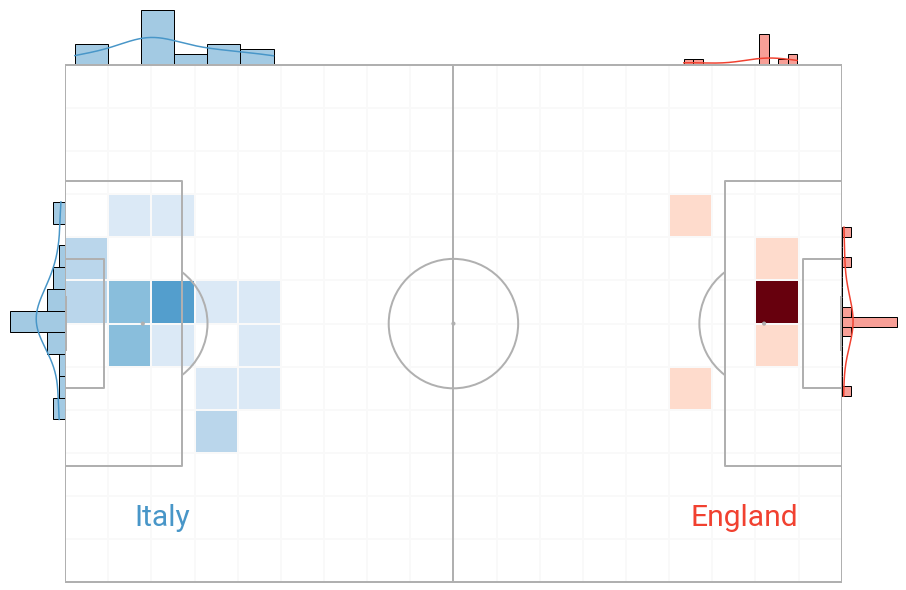

In [6]:
fig, axs = pitch.jointgrid(figheight=10, left=None, bottom=0.075, grid_height=0.8,
                           axis=False,title_height=0, endnote_height=0)

bs1 = pitch.bin_statistic(df_team1.x, df_team1.y, bins=(18, 12))
bs2 = pitch.bin_statistic(df_team2.x, df_team2.y, bins=(18, 12))

# get the min/ max values for normalizing across both teams
vmax = max(bs2['statistic'].max(), bs1['statistic'].max())
vmin = max(bs2['statistic'].min(), bs1['statistic'].min())

# set values where zero shots to nan values so it does not show up in the heatmap
# i.e. zero values take the background color
bs1['statistic'][bs1['statistic'] == 0] = np.nan
bs2['statistic'][bs2['statistic'] == 0] = np.nan

# set the vmin/ vmax so the colors depend on the minimum/maximum value for both teams
hm1 = pitch.heatmap(bs1, ax=axs['pitch'], cmap='Reds', vmin=vmin, vmax=vmax, edgecolor='#f9f9f9')
hm2 = pitch.heatmap(bs2, ax=axs['pitch'], cmap='Blues', vmin=vmin, vmax=vmax, edgecolor='#f9f9f9')

# histograms with kdeplot
team1_hist_y = sns.histplot(y=df_team1.y, ax=axs['right'], color=red, linewidth=1, kde=True)
team1_hist_x = sns.histplot(x=df_team1.x, ax=axs['top'], color=red, linewidth=1, kde=True)
team2_hist_x = sns.histplot(x=df_team2.x, ax=axs['top'], color=blue, linewidth=1, kde=True)
team2_hist_y = sns.histplot(y=df_team2.y, ax=axs['left'], color=blue, linewidth=1, kde=True)
txt1 = axs['pitch'].text(x=15, y=70, s=team2, fontproperties=fm.prop, color=blue,
                         ha='center', va='center', fontsize=30)
txt2 = axs['pitch'].text(x=105, y=70, s=team1, fontproperties=fm.prop, color=red,
                         ha='center', va='center', fontsize=30)

plt.savefig("Shots.jpg", bbox_inches = 'tight')